<a href="https://colab.research.google.com/github/jihenBouguerra/AI-Snake-Mouse-Game/blob/master/Hotel_Reviews_Data_in_Europe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Text mining project 
# 1. Download data from kaggle 

In [0]:
!rm -dr ~/.kaggle
!pip install -U -q kaggle


!mkdir -p ~/.kaggle
from google.colab import files

rm: cannot remove '/root/.kaggle': No such file or directory


In [0]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yosrimimouna","key":"63008de2f8e2da22d8aadad3b6bb3e34"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download --force -d jiashenliu/515k-hotel-reviews-data-in-europe

 69% 31.0M/45.1M [00:00<00:00, 113MB/s] 
100% 45.1M/45.1M [00:00<00:00, 150MB/s]


In [0]:
!unzip 515k-hotel-reviews-data-in-europe.zip

Archive:  515k-hotel-reviews-data-in-europe.zip
  inflating: Hotel_Reviews.csv       


In [0]:
import numpy as np 
import pandas as pd
import os
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
from nltk.stem.porter import *
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2. Reading the csv file

In [0]:
df_train = pd.read_csv("Hotel_Reviews.csv")

In [0]:
df_train.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


# 3. Data preparation



## What  will we do? 

* By using df_train, we will create new dataframe that contains a review column with sentiment (0,1).

## Steps: 
* Creat  a dataframe that contain positive reviews.

* Creat  a dataframe that contain negative reviews.

*  Concat the two dataframes into a  new one.

* Shuffle Data

### Creating the positive_rev Dataframe


In [0]:
columns =['Hotel_Address',	'Additional_Number_of_Scoring',	'Review_Date',	'Average_Score',	'Hotel_Name',	'Reviewer_Nationality',	'Total_Number_of_Reviews',	'Positive_Review'	,'Review_Total_Positive_Word_Counts',	'Total_Number_of_Reviews_Reviewer_Has_Given',	'Reviewer_Score',	'Tags',	'days_since_review',	'lat','lng']
positive_rev=df_train[['Hotel_Address',	'Additional_Number_of_Scoring',	'Review_Date',	'Average_Score',	'Hotel_Name',	'Reviewer_Nationality',	'Total_Number_of_Reviews',	'Positive_Review'	,'Review_Total_Positive_Word_Counts',	'Total_Number_of_Reviews_Reviewer_Has_Given',	'Reviewer_Score',	'Tags',	'days_since_review',	'lat','lng']]
positive_rev['review']=positive_rev['Positive_Review']
positive_rev['review_word_counts']=positive_rev['Review_Total_Positive_Word_Counts']
positive_rev=positive_rev.drop(['Positive_Review','Review_Total_Positive_Word_Counts'],axis=1)
positive_rev['sentiment']=1
positive_rev.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Total_Number_of_Reviews,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review,review_word_counts,sentiment
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,1403,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Only the park outside of the hotel was beauti...,11,1
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,1403,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No real complaints the hotel was great great ...,105,1
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,1403,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Location was good and staff were ok It is cut...,21,1
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,1403,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Great location in nice surroundings the bar a...,26,1
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,1403,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Amazing location and building Romantic setting,8,1


In [0]:
# Print the first 10 review and numerate them with enumerate
review = list(positive_rev['review'])

for message_no, reviews in enumerate(review[:10]):
    print(message_no, reviews)
    print('\n')

0  Only the park outside of the hotel was beautiful 


1  No real complaints the hotel was great great location surroundings rooms amenities and service Two recommendations however firstly the staff upon check in are very confusing regarding deposit payments and the staff offer you upon checkout to refund your original payment and you can make a new one Bit confusing Secondly the on site restaurant is a bit lacking very well thought out and excellent quality food for anyone of a vegetarian or vegan background but even a wrap or toasted sandwich option would be great Aside from those minor minor things fantastic spot and will be back when i return to Amsterdam 


2  Location was good and staff were ok It is cute hotel the breakfast range is nice Will go back 


3  Great location in nice surroundings the bar and restaurant are nice and have a lovely outdoor area The building also has quite some character 


4  Amazing location and building Romantic setting 


5  Good restaurant with mode

###Creating the negative_rev Dataframe

In [0]:
negative_rev=df_train[['Hotel_Address',	'Additional_Number_of_Scoring',	'Review_Date',	'Average_Score',	'Hotel_Name',	'Reviewer_Nationality',	'Total_Number_of_Reviews',	'Negative_Review'	,'Review_Total_Negative_Word_Counts',	'Total_Number_of_Reviews_Reviewer_Has_Given',	'Reviewer_Score',	'Tags',	'days_since_review',	'lat','lng']]
negative_rev['review']=negative_rev['Negative_Review']
negative_rev['review_word_counts']=negative_rev['Review_Total_Negative_Word_Counts']
negative_rev=negative_rev.drop(['Negative_Review','Review_Total_Negative_Word_Counts'],axis=1)
negative_rev['sentiment']=0
negative_rev.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Total_Number_of_Reviews,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review,review_word_counts,sentiment
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,1403,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...,397,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,1403,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative,0,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,1403,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...,42,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,1403,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...,210,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,1403,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...,140,0


In [0]:
# Print the first 10 review and numerate them with enumerate
review = list(negative_rev['review'])

for message_no, reviews in enumerate(review[:10]):
    print(message_no, reviews)
    print('\n')

0  I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin 

### Concat the two dataframes into a new dataframe

In [0]:
frames = [negative_rev,positive_rev]
df_review = pd.concat(frames)
df_review.shape


(1031476, 16)

In [0]:
df_review.isnull().sum()
# *-*

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Total_Number_of_Reviews                          0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           6536
lng                                           6536
review                                           0
review_word_counts                               0
sentiment                                        0
dtype: int64

In [0]:
df_sub=df_review.copy()

In [0]:
df_sub.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Total_Number_of_Reviews,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review,review_word_counts,sentiment
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,1403,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...,397,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,1403,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative,0,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,1403,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...,42,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,1403,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...,210,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,1403,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...,140,0


###Shuffle Data
 * We can note that all  negative review are on top followed by positive review, so, we need to Shuffle the data


In [0]:
df_sub = df_sub.sample(frac=1).reset_index(drop=True)

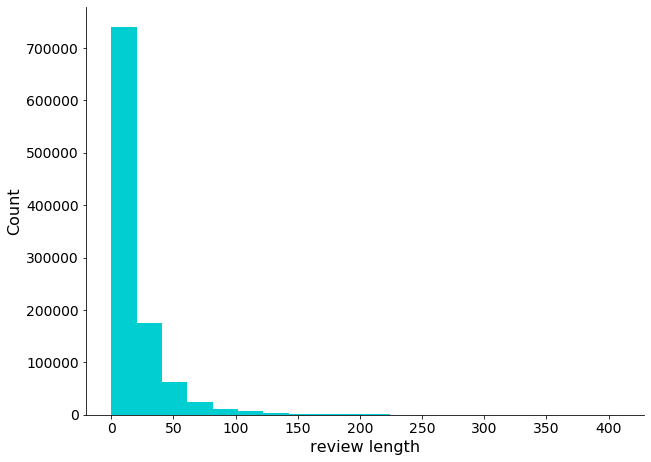

In [0]:
# Visualize review length
plt.figure(figsize=(10, 7.5))
# Remove the plot frame lines
ax1 = plt.subplot(111)  
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False)  
# Get axis only on the bottom and left of the plot
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left() 
# Format xticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# Format labels
plt.xlabel("review length", fontsize=16)  
plt.ylabel("Count", fontsize=16)
# Plot histogram with Tweets lenght
plt.hist(list(df_sub['review_word_counts'].values),  color="darkturquoise", bins=20)
# Change background colour to white
ax1 = plt.gca()
ax1.set_facecolor('w')

plt.show()

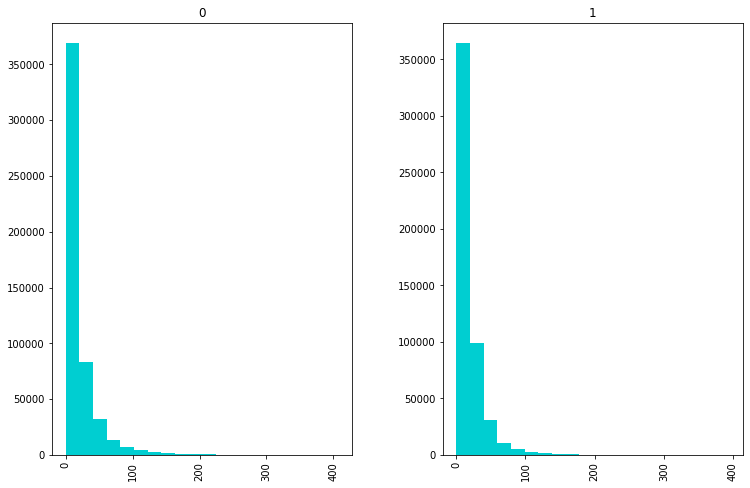

In [0]:
# Check if length is a distinguishing feature between a positive negative reviews
df_sub.hist(column='review_word_counts', by='sentiment', color="darkturquoise", bins=20, figsize=(12,8))

# Change axes and tick labels font size
params = {'axes.titlesize':'12',
          'xtick.labelsize':'12',
          'ytick.labelsize':'12'}
plt.rcParams.update(params)

plt.show()

# 4. Text pre-processing 

 **Summary of pre-processing steps:**

* Remove special characters using [^a-zA-Z#]
* Remove short words
* Remove ponctuation signs using string.punctuation
* Remove stopwords using stopwords.words('english')
* Apply stemming by removing all the suffixes from words (e.g. 'cats', 'catlike', and 'catty' all should be the same as the string 'cat') 

In [0]:
# Remove special characters
df_sub['review'] = df_sub['review'].str.replace("[^a-zA-Z#]", " ")
# Check first 5 messages
review = list(df_sub['review'])

for message_no, reviews in enumerate(review[:5]):
    print(message_no, reviews)
    print('\n')

0 No Negative


1  The hotel was right next to barcelonas football ground excellent


2  Prices


3  I did not like the lady from reception who did not understand my situation and was rude and unkindly I specify that next day at the reception it was a girl from Romania who was very kind and it was huge difference of attitude I have booked a room of   sqm standard tween bed and I have got a SMALL standard room with double bed Lady from the day I have arrived on  st of July at about   pm from the reception did not even bother to treat with understanding and kindness the situation and worse tried nervously to convince me I am wrong She even assumed very naughty that maybe this is my first trip abroad Unfortunately she did not know to whom she had spoken All these happened in front of my young daughter When I have shown her the pictures she separated somehow the beds in the same room She could have done it at least from the beginning without her confusing and misleading words Finally she a

In [0]:
# Remove words that are very short and might not have any meaning
df_sub['review'] = df_sub['review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# Check first 5 messages
df_sub['review'].head()

0                                             Negative
1    hotel right next barcelonas football ground ex...
2                                               Prices
3    like lady from reception understand situation ...
4    very nice stuff they extra organizing breakfas...
Name: review, dtype: object

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#remove ponctuation 
df_sub['review']=df_sub['review'].str.translate(str.maketrans('', '', string.punctuation))
def text_process(mess):
    # Use stopwords.words('english') to remove some of the most common words (e.g. 'the', 'of', 'a')
    return [word for word in mess.split() if word.lower() not in stopwords.words('english')]

df_sub['review'] = df_sub['review'].apply(text_process)



In [0]:
# Check first 5 messages
df_sub['review'].head()

0                                           [Negative]
1    [hotel, right, next, barcelonas, football, gro...
2                                             [Prices]
3    [like, lady, reception, understand, situation,...
4    [nice, stuff, extra, organizing, breakfast, pa...
Name: review, dtype: object

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


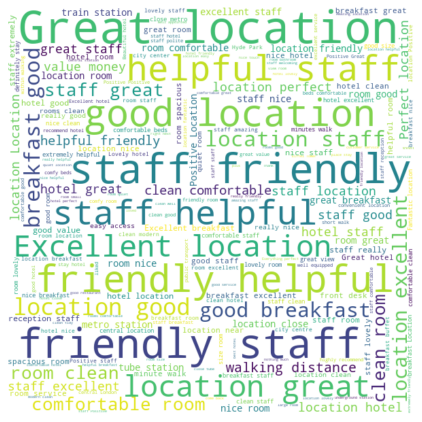

In [0]:
# Create a word cloud at this step to understand what are the most common words used in each tweet
# To speed up processing will split the data between positive and negative sentimet and plot a word cloud each

# Take only positive review
positive_review = df_sub.loc[df_sub['sentiment'] == 1]['review']
# Reset the index
positive_review.reset_index(inplace=True, drop=True)
# Join each element in a list together
for i in range(len(positive_review)):
    positive_review[i] = ' '.join(positive_review[i])
# Join all the words in a single string
all_positive_words = ' '.join([text for text in positive_review])
# Create the wordcloud object
wordcloud = WordCloud(width=600, height=600, background_color="white").generate(all_positive_words)
# Plot graph
plt.figure(figsize=(10, 7.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


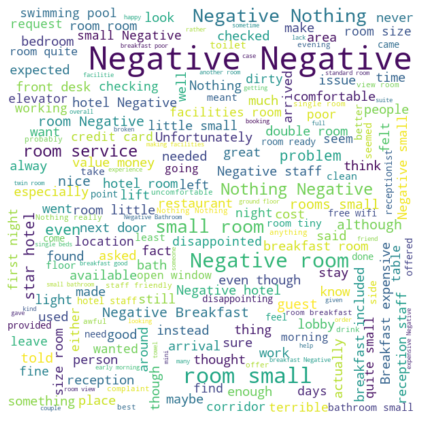

In [0]:
# Create a word cloud at this step to understand what are the most common words used in each tweet


# Take only negative reviews
negative_review = df_sub.loc[df_sub['sentiment'] == 0]['review']
# Reset the index
negative_review.reset_index(inplace=True, drop=True)
# Join each element in a list together
for i in range(len(negative_review)):
    negative_review[i] = ' '.join(negative_review[i])
# Join all the words in a single string
all_negative_words = ' '.join([text for text in negative_review])
# Create the wordcloud object
wordcloud_neg = WordCloud(width=600, height=600, background_color="white").generate(all_negative_words)
# Plot graph
plt.figure(figsize=(10, 7.5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)

plt.show()

In [0]:
df_sum=df_sub.copy()
# Use PorterStemmer() method to apply stemming to all the reviews
stemmer = PorterStemmer()

df_sub['review'] = df_sub['review'].apply(lambda x: [stemmer.stem(i) for i in x]) # stemming


In [0]:
# Check first 5 messages
df_sub['review'].head()

0    [locat, perfect, staff, help, comfort, room]
1                                           [neg]
2                                         [posit]
3                                   [room, clean]
4                                          [noth]
Name: review, dtype: object

In [0]:
# Put back the column reveiw on his original form with a string per row
clean_rev = df_sub['review']
clean_rev=clean_rev.apply(lambda x : ' '.join(x))


In [0]:
df_sub['review'] = clean_rev

df_sub['review'].head()

0    locat perfect staff help comfort room
1                                      neg
2                                    posit
3                               room clean
4                                     noth
Name: review, dtype: object

In [0]:
review=df_sub['review']
for message_no, reviews in enumerate(review[:5]):
    print(message_no, reviews)
    print('\n')

0 neg


1 hotel right next barcelona footbal ground excel


2 price


3 like ladi recept understand situat rude unkindli specifi next recept girl romania kind huge differ attitud book room standard tween small standard room doubl ladi arriv juli recept even bother treat understand kind situat wors tri nervous convinc wrong even assum naughti mayb first trip abroad unfortun know spoken happen front young daughter shown pictur separ somehow bed room could done least begin without confus mislead word final admit avail left paid book anoth type room reaction penni back


4 nice stuff extra organ breakfast packag leav leav jacket desk bring room welcom cava teatim free sandwich tapaz cake great breakfast comfort close harbour nice restaur near




# 5. Vectorization
 **Summary of pre-processing steps:**
 
* Use CountVectorizer to count the number of times each word occurs in every message
* Use TF-IDF to apply weighting and normalization using the following formulas:
* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
* IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

In [0]:
# Use CountVectorizer object to create a matrix will all the words in every review
# For this analysis will use the default parameters for CountVectorizer
review_transformer = CountVectorizer().fit(df_sub['review'])

# Print total number of vocabulary words
print(len(review_transformer.vocabulary_))

54648


In [0]:
# Check an example in detail and take the 4th review in the dataset and see its vector representation
# For reference this is the text of the review:
review_3 = df_sub['review'][3]

vector_3 = review_transformer.transform([review_3])
print(vector_3)
print(vector_3.shape)

# There are n unique words in this message and the second number (e.g. 21363) will allow one to see what word that is

  (0, 9371)	1
  (0, 40777)	1
(1, 54648)


In [0]:
# Apply the transformer in the entire review series
review_bag_of_words = review_transformer.transform(df_sub['review'])
# Check the shape and number of non-zero ocurrences
print('Shape of Matrix: ', review_bag_of_words.shape)
print('Amount of Non-Zero occurences: ', review_bag_of_words.nnz)

Shape of Matrix:  (1031476, 54648)
Amount of Non-Zero occurences:  8134437


In [0]:
# Adjust the weights with TF-IDF
# Each weight is calculated with the following formula:
# Scenario: in one document with 100 words the word 'data' appears 5 times. There are 1,000 ducoments to classify and the word 'data' appears 90 times in all of them
# TF = 5/100 = 0.05
# IDF = log(1,000/90) = 1
# Tf-idf weight = 0.05 * 1 = 0.05
from sklearn.feature_extraction.text import TfidfTransformer
# Apply the transformer to the bag of words
review_tfidf_transformer = TfidfTransformer().fit(review_bag_of_words)
review_tfidf = review_tfidf_transformer.transform(review_bag_of_words)
# Check the shape
print(review_tfidf.shape)

(1031476, 54648)


# 5. Creating the model
* Naive Bayes is the first algorithm that should be considered for solving a text classification problem.

In [0]:
X=review_tfidf
Y=df_sub['sentiment']
X_train, X_test, y_train, y_test = \
train_test_split(X, Y, test_size=0.3)

In [0]:
print(X_train.shape)

(722033, 54648)


In [0]:
# Create the Multinomial Naives Bayes object
review_sentiment_model = MultinomialNB()
# Fit X_train and y_train to train the model
review_sentiment_model.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
te="like ladi recept understand situat rude unkindli specifi next recept girl romania kind huge differ attitud book room standard tween small standard room doubl ladi arriv juli recept even bother treat understand kind situat wors tri nervous convinc wrong even assum naughti mayb first trip abroad unfortun know spoken happen front young daughter shown pictur separ somehow bed room could done least begin without confus mislead word final admit avail left paid book anoth type room reaction penni back"
t=review_transformer.transform([te])
t1=review_tfidf_transformer.transform(t)
print('predicted:', review_sentiment_model.predict(t1))

predicted: [0]


In [0]:
# Make one prediction 
print(X_test[0])
print('predicted:', review_sentiment_model.predict(X_test)[0])
print('expected:', y_test.iloc[0])


  (0, 43947)	0.4116648231349205
  (0, 40777)	0.23711717625288434
  (0, 4518)	0.4381892126317447
  (0, 593)	0.7630843544801093
predicted: 0
expected: 0


In [0]:
# Apply the model to predict X_test values
predictions = review_sentiment_model.predict(X_test)

# 6. Model evaluation

In [0]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, predictions))

[[140424  14615]
 [ 10429 143975]]


In [0]:
# Print classification report
from sklearn.metrics import classification_report
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92    155039
           1       0.91      0.93      0.92    154404

    accuracy                           0.92    309443
   macro avg       0.92      0.92      0.92    309443
weighted avg       0.92      0.92      0.92    309443



# 7. Topic extraction model

 **Summary of pre-processing steps:**

* We will use Non-negative Matrix Factorization(NMF) to create topics because  NMF works with TFIDF.

* Once the document term matrix is generated, we can create a probability matrix that contains probabilities of all the words in the vocabulary for all the topics. To do so, we can use the NMF class from the sklearn.decomposition module.



# Non-negative Matrix Factorization Algorithm
* NMF is a Linear-algeabreic model, that factors high-dimensional vectors into a low-dimensionality representation
* By given a matrix A, we can obtain two matrices W and H, such that A= WH
* A (Document-word matrix) ,W (Basis vectors), H (Coefficient matrix) 


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
doc_term_matrix = tfidf_vect.fit_transform(df_sub['review']) 


In [0]:

from sklearn.decomposition import NMF
nmf = NMF(n_components=5, random_state=42)
nmf.fit(doc_term_matrix ) 


NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=5, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

 * let's randomly get 10 words from our vocabulary: 

In [0]:
import random
for i in range(10):
 random_id = random.randint(0,len(tfidf_vect.get_feature_names()))
 print(tfidf_vect.get_feature_names()[random_id]) 


also
craw
madagascar
bottkebank
octain
coliflow
reseidenti
infrastructur
dengeru
empole


In [0]:
first_topic = nmf.components_[0]
top_topic_words = first_topic.argsort()[-10:] 

In [0]:
for i,topic in enumerate(nmf.components_):
 print(f'Top 10 words for topic #{i}:')
 print([tfidf_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
 print('\n') 

Top 10 words for topic #0:
['report', 'experi', 'thing', 'point', 'stay', 'anyth', 'hotel', 'think', 'comment', 'neg']


Top 10 words for topic #1:
['staff', 'fantast', 'station', 'conveni', 'central', 'perfect', 'excel', 'good', 'great', 'locat']


Top 10 words for topic #2:
['station', 'near', 'well', 'perfect', 'great', 'central', 'excel', 'good', 'hotel', 'posit']


Top 10 words for topic #3:
['absolut', 'much', 'hotel', 'complain', 'perfect', 'dislik', 'everyth', 'realli', 'like', 'noth']


Top 10 words for topic #4:
['nice', 'great', 'hotel', 'clean', 'good', 'breakfast', 'help', 'friendli', 'room', 'staff']




In [0]:
new_doc = ["like ladi recept understand situat rude unkindli specifi next recept girl romania kind huge differ attitud book room standard tween small standard room doubl ladi arriv juli recept even bother treat understand kind situat wors tri nervous convinc wrong even assum naughti mayb first trip abroad unfortun know spoken happen front young daughter shown pictur separ somehow bed room could done least begin without confus mislead word final admit avail left paid book anoth type room reaction penni back"]
Y = tfidf_vect.transform(new_doc)
prediction = nmf.transform(Y)
print(prediction)

[[8.28746893e-07 0.00000000e+00 0.00000000e+00 1.61112583e-04
  9.19329758e-03]]


In [0]:
df_train.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

#8. Summarization using TFIDF 
*  Tokenize the sentences

*  Remove unmeaningful character

*  Giving importance for each sentence

*  Exract the most meaningful sentences

In [0]:
# Put back the column reveiw on his original form with a string per row
clean_rev = df_sum['review']
clean_rev=clean_rev.apply(lambda x : ' '.join(x))

In [0]:
df_sum['review'] = clean_rev

df_sum['review'].head()

0                                             Negative
1    hotel right next barcelonas football ground ex...
2                                               Prices
3    like lady reception understand situation rude ...
4    nice stuff extra organizing breakfast packages...
Name: review, dtype: object

In [0]:
longest_review=df_sum.loc[df_sum.groupby('Hotel_Name')['review_word_counts'].idxmax()]
text=longest_review[longest_review['review_word_counts']==longest_review['review_word_counts'].max()]
longest_text=' '.join(x for x in text['review'].values)
print(longest_text)

staff experience even booking January arrived lots flight delays paid full rate euros including deposit arrived confused stayed previous January girlfriend must sorted deposit told idea euro deposit WAsnt clearly displayed booking booked check email small print fine told could sort told take seat come sort holding suffer severe panic attacks anxiety started panic staff looked something mental health quite decided holiday birthday Monday turning booked Victoria Amsterdam business friends moment arrived hotel felt unwelcome unwanted kept told take seat guests could eventually panic handed phone receptionist told mother ring panic could card deposit told would take today money want book Incase sorted next wanted check eventually money transferred felt staff extremely unhelpful rude unlike stayed first time great start holiday paying euro drink mini expected either pleased room step infront door tripped falling door hurting head second popping outside lunch ciggettette arrived whole road s

In [0]:
from nltk.tokenize import sent_tokenize,word_tokenize 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from nltk.corpus import stopwords 

In [0]:
import math 
import operator 

In [0]:
Stopwords = set(stopwords.words('english')) 

In [0]:
def tf_score(word,sentence):
 word_frequency_in_sentence = 0
 len_sentence = len(sentence)
 for word_in_sentence in sentence.split():
  if word == word_in_sentence:
    word_frequency_in_sentence = word_frequency_in_sentence + 1
 tf = word_frequency_in_sentence/ len_sentence
 return tf 


In [0]:
def idf_score(no_of_sentences,word,sentences):
 no_of_sentence_containing_word = 0
 for sentence in sentences:
  sentence = re.sub(r'\d+', '', sentence)
  sentence = sentence.split()
  sentence = [word for word in sentence if word.lower() not in Stopwords and len(word)>1]
  sentence = [word.lower() for word in sentence]

  if word in sentence:
    no_of_sentence_containing_word = no_of_sentence_containing_word + 1
 idf = math.log10(no_of_sentences/no_of_sentence_containing_word)
 return idf 


In [0]:
def word_tfidf(dict_freq,word,sentences,sentence):
  tf = tf_score(word,sentence)
  idf = idf_score(len(sentences),word,sentences)
  tf_idf = tf_idf_score(tf,idf)
  return tf_idf 

In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
tokenized_sentence = sent_tokenize(longest_text) 

In [0]:
tokenized_words= word_tokenize(longest_text) 
print(tokenized_words)

['staff', 'experience', 'even', 'booking', 'January', 'arrived', 'lots', 'flight', 'delays', 'paid', 'full', 'rate', 'euros', 'including', 'deposit', 'arrived', 'confused', 'stayed', 'previous', 'January', 'girlfriend', 'must', 'sorted', 'deposit', 'told', 'idea', 'euro', 'deposit', 'WAsnt', 'clearly', 'displayed', 'booking', 'booked', 'check', 'email', 'small', 'print', 'fine', 'told', 'could', 'sort', 'told', 'take', 'seat', 'come', 'sort', 'holding', 'suffer', 'severe', 'panic', 'attacks', 'anxiety', 'started', 'panic', 'staff', 'looked', 'something', 'mental', 'health', 'quite', 'decided', 'holiday', 'birthday', 'Monday', 'turning', 'booked', 'Victoria', 'Amsterdam', 'business', 'friends', 'moment', 'arrived', 'hotel', 'felt', 'unwelcome', 'unwanted', 'kept', 'told', 'take', 'seat', 'guests', 'could', 'eventually', 'panic', 'handed', 'phone', 'receptionist', 'told', 'mother', 'ring', 'panic', 'could', 'card', 'deposit', 'told', 'would', 'take', 'today', 'money', 'want', 'book', 'In

In [0]:
def tf_idf_score(tf,idf):
 return tf*idf 

In [0]:
def freq(words):
  words = [word.lower() for word in words]
  dict_freq = {} 
  2/8
  words_unique = []
  for word in words:
    if word not in words_unique:
      words_unique.append(word)
  for word in words_unique:
    dict_freq[word] = words.count(word)
  return dict_freq 


In [0]:
word_freq = freq(tokenized_words) 
print(word_freq)

{'staff': 3, 'experience': 1, 'even': 1, 'booking': 2, 'january': 2, 'arrived': 4, 'lots': 1, 'flight': 1, 'delays': 1, 'paid': 1, 'full': 1, 'rate': 1, 'euros': 1, 'including': 1, 'deposit': 4, 'confused': 1, 'stayed': 2, 'previous': 1, 'girlfriend': 1, 'must': 1, 'sorted': 2, 'told': 6, 'idea': 1, 'euro': 2, 'wasnt': 1, 'clearly': 1, 'displayed': 1, 'booked': 2, 'check': 2, 'email': 1, 'small': 1, 'print': 1, 'fine': 1, 'could': 3, 'sort': 2, 'take': 3, 'seat': 2, 'come': 1, 'holding': 1, 'suffer': 1, 'severe': 1, 'panic': 4, 'attacks': 1, 'anxiety': 1, 'started': 1, 'looked': 1, 'something': 1, 'mental': 1, 'health': 1, 'quite': 1, 'decided': 1, 'holiday': 2, 'birthday': 1, 'monday': 1, 'turning': 1, 'victoria': 1, 'amsterdam': 1, 'business': 1, 'friends': 1, 'moment': 1, 'hotel': 2, 'felt': 2, 'unwelcome': 1, 'unwanted': 1, 'kept': 1, 'guests': 1, 'eventually': 2, 'handed': 1, 'phone': 1, 'receptionist': 1, 'mother': 1, 'ring': 1, 'card': 1, 'would': 1, 'today': 1, 'money': 3, 'wan

In [0]:
no_of_sentences = 3
c = 1



In [0]:
sentence_with_importance = {} 

In [0]:
def sentence_importance(sentence,dict_freq,sentences):
 sentence_score = 0
 pos_tagged_sentence = []
 pos_tagged_sentence = pos_tagging(sentence) 
 for word in pos_tagged_sentence:
  if word.lower() not in Stopwords and word not in Stopwords and len(word)>1:
    word = word.lower()
    sentence_score = sentence_score + word_tfidf(dict_freq,word,sentences,sentence)
 return sentence_score 

In [0]:
def pos_tagging(text):
 pos_tag = nltk.pos_tag(text.split())
 pos_tagged_noun_verb = []
 for word,tag in pos_tag:
  if tag == "NN" or tag == "NNP" or tag == "NNS" or tag == "VB" or tag =="VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ":
    pos_tagged_noun_verb.append(word)
 return pos_tagged_noun_verb 

In [0]:
for sent in tokenized_sentence:
    sentenceimp = sentence_importance(sent,word_freq,tokenized_sentence)
    sentence_with_importance[c] = sentenceimp
    c = c+1
sentence_with_importance = sorted(sentence_with_importance.items(),key=operator.itemgetter(1),reverse=True)
cnt = 0
summary = []
sentence_no = []
for word_prob in sentence_with_importance:
    if cnt < no_of_sentences:
        sentence_no.append(word_prob[0])
        cnt = cnt+1
    else:
        break
sentence_no.sort()
cnt = 0
for sentence in tokenized_sentence:
    if cnt in sentence_no:
        summary.append(sentence)
    cnt = cnt+1
summary = " ".join(summary)
print("Summary:")
print(summary)

Summary:



In [0]:
df_sum=df_review.copy()

In [0]:
def remove_special_characters(text):
  regex = r'[^a-zA-Z0-9\s]'
  text = re.sub(regex,'',text)
  return text

def freq(words):
  words = [word.lower() for word in words]
  dict_freq = {}
  words_unique = []
  for word in words:
    if word not in words_unique:
      words_unique.append(word)
  for word in words_unique:
    dict_freq[word] = words.count(word)
  return dict_freq

def pos_tagging(text):
  pos_tag = nltk.pos_tag(text.split())
  pos_tagged_noun_verb = []
  for word,tag in pos_tag:
    if tag == "NN" or tag == "NNP" or tag == "NNS" or tag == "VB" or tag =="VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ":
      pos_tagged_noun_verb.append(word)
  return pos_tagged_noun_verb

def tf_score(word,sentence):
  word_frequency_in_sentence = 0
  len_sentence = len(sentence)
  for word_in_sentence in sentence.split():
    if word == word_in_sentence:
      word_frequency_in_sentence = word_frequency_in_sentence + 1
  tf = word_frequency_in_sentence/ len_sentence
  return tf

def idf_score(no_of_sentences,word,sentences):
  no_of_sentence_containing_word = 0
  for sentence in sentences:
    sentence = remove_special_characters(str(sentence))
    sentence = re.sub(r'\d+', '', sentence)
    sentence = sentence.split()
    sentence = [word for word in sentence if word.lower() not in Stopwords and len(word)>1]
    sentence = [word.lower() for word in sentence]
    if word in sentence:
      no_of_sentence_containing_word = no_of_sentence_containing_word + 1
  idf = math.log10(no_of_sentences/no_of_sentence_containing_word)
  return idf


def tf_idf_score(tf,idf):
  return tf*idf

def word_tfidf(dict_freq,word,sentences,sentence):
  tf = tf_score(word,sentence)
  idf = idf_score(len(sentences),word,sentences)
  tf_idf = tf_idf_score(tf,idf)
  return tf_idf
  
def sentence_importance(sentence,dict_freq,sentences):
  sentence_score = 0
  sentence = remove_special_characters(str(sentence))
  pos_tagged_sentence = []
  pos_tagged_sentence = pos_tagging(sentence)
  for word in pos_tagged_sentence:
    if word.lower() not in Stopwords and word not in Stopwords and len(word)>1:
      word = word.lower()
      sentence_score = sentence_score + word_tfidf(dict_freq,word,sentences,sentence)
  return sentence_score

In [0]:
text = DOCUMENT
tokenized_sentence = sent_tokenize(text)
text = remove_special_characters(str(text))
tokenized_words_with_stopwords = word_tokenize(text)
tokenized_words = [word for word in tokenized_words_with_stopwords if word not in
Stopwords]
tokenized_words = [word for word in tokenized_words if len(word) > 1]
tokenized_words = [word.lower() for word in tokenized_words]
word_freq = freq(tokenized_words)
no_of_sentences = 3
print(no_of_sentences)
c = 1
sentence_with_importance = {}
for sent in tokenized_sentence:
    sentenceimp = sentence_importance(sent,word_freq,tokenized_sentence)
    sentence_with_importance[c] = sentenceimp
    c = c+1
sentence_with_importance = sorted(sentence_with_importance.items(),key=operator.itemgetter(1),reverse=True)
cnt = 0
summary = []
sentence_no = []
for word_prob in sentence_with_importance:
    if cnt < no_of_sentences:
        sentence_no.append(word_prob[0])
        cnt = cnt+1
    else:
        break
sentence_no.sort()
cnt = 0
for sentence in tokenized_sentence:
    if cnt in sentence_no:
        summary.append(sentence)
    cnt = cnt+1
summary = " ".join(summary)
print("Summary:")
print(summary)

NameError: ignored

In [0]:
longest_review=df_train.loc[df_train.groupby('Hotel_Name')['Review_Total_Negative_Word_Counts'].idxmax()]
text=longest_review[longest_review['Review_Total_Negative_Word_Counts']==longest_review['Review_Total_Negative_Word_Counts'].max()]
DOCUMENT=' '.join(x for x in text['Negative_Review'].values)
print(DOCUMENT)

In [0]:
import re
import math
import operator
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt')
stopword_list = nltk.corpus.stopwords.words('english')
DOCUMENT = """Tunisia officially the Republic of Tunisia is a country in t
he Maghreb region of North Africa, covering 163,610 square kilometres (63,
170
square miles). Its northernmost point, Cape Angela, is also the northernmo
st point on the African continent.
 Tunisia is bordered by Algeria to the west and southwest, Libya to the so
utheast, and the Mediterranean Sea to the north and east.
 Tunisia's population was 11.5 million in 2017.Tunisia's name is derived f
rom its capital city, Tunis (Berber native name: Tunest),
 which is located on its northeast coast.
Geographically, Tunisia contains the eastern end of the Atlas Mountains, a
nd the northern reaches of the Sahara desert.
Much of the rest of the country's land is fertile soil. Its 1,300 kilometr
es (810 miles) of coastline include the African conjunction of
the western and eastern parts of the Mediterranean Basin and, by means of
the Sicilian Strait and Sardinian Channel, feature the African mainland's
second and third nearest points to Europe after Gibraltar. """


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total Sentences: 7
[[1.   0.   0.11 0.04 0.05 0.07 0.03]
 [0.   1.   0.   0.   0.   0.   0.11]
 [0.11 0.   1.   0.03 0.04 0.   0.04]
 [0.04 0.   0.03 1.   0.03 0.   0.  ]
 [0.05 0.   0.04 0.03 1.   0.   0.04]
 [0.07 0.   0.   0.   0.   1.   0.  ]
 [0.03 0.11 0.04 0.   0.04 0.   1.  ]]
[0]
Tunisia officially the Republic of Tunisia is a country in t
he Maghreb region of North Africa, covering 163,610 square kilometres (63,
170
square miles).


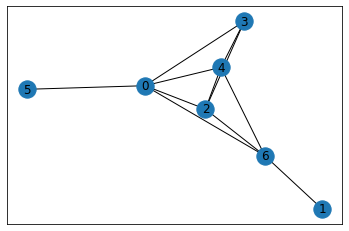

In [0]:
def parse_document(document):
 document = document.strip()
 sentences = nltk.sent_tokenize(document)
 sentences = [sentence.strip() for sentence in sentences]
 return sentences
def tokenize_text(text):
 tokens = nltk.word_tokenize(text)
 tokens = [token.strip() for token in tokens]
 return tokens
def remove_special_characters(text):
 tokens = tokenize_text(text)
 pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
 filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
 filtered_text = ' '.join(filtered_tokens)
 return filtered_text
def remove_stopwords(text):
 tokens = tokenize_text(text)
 filtered_tokens = [token for token in tokens if token not in
 stopword_list]
 filtered_text = ' '.join(filtered_tokens)
 return filtered_text
def normalize_corpus(corpus, tokenize=False):
 normalized_corpus = []
 for text in corpus:
   text = remove_special_characters(text)
   text = remove_stopwords(text)
   normalized_corpus.append(text)
 if tokenize:
   text = tokenize_text(text) 
   normalized_corpus.append(text)
 return normalized_corpus 
sentences = parse_document(DOCUMENT)
norm_sentences = normalize_corpus(sentences,tokenize=False)
print ("Total Sentences:", len(norm_sentences)) 
# define number of sentences in final summary
num_sentences = 1
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def build_feature_matrix(documents, feature_type='frequency'):
 feature_type = feature_type.lower().strip()

 if feature_type == 'frequency':
  vectorizer = CountVectorizer()
 elif feature_type == 'tfidf':
  vectorizer = TfidfVectorizer()
 else:
  raise Exception("Wrong feature type entered. Possible values: 'frequency', 'tfidf'")
 feature_matrix = vectorizer.fit_transform(documents).astype(float)
 return vectorizer, feature_matrix
# construct weighted document term matrix
vec, dt_matrix = build_feature_matrix(norm_sentences,feature_type='tfidf')
# construct the document similarity matrix
similarity_matrix = (dt_matrix * dt_matrix.T)
# view the document similarity matrix
print (np.round(similarity_matrix.todense(), 2))
from networkx import *
# build the similarity graph
similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)
# view the similarity graph
networkx.draw_networkx(similarity_graph)
# compute pagerank scores for all the sentences
scores = networkx.pagerank(similarity_graph)
# rank sentences based on their scores
ranked_sentences = sorted(((score, index)for index, score in scores.items()),reverse=True)
# view the ranked sentences
ranked_sentences
# get the top sentence indices for our summary
top_sentence_indices = [ranked_sentences[index][1]for index in range(num_sentences)]
top_sentence_indices.sort()
# view the top sentence indices
print (top_sentence_indices)
# construct the document summary
for index in top_sentence_indices:
  print (sentences[index]) 


In [0]:
def textrank_text_summarizer(documents, num_sentences=3, feature_type='frequency'): 
  vec, dt_matrix = build_feature_matrix(norm_sentences,feature_type='tfidf')
  similarity_matrix = (dt_matrix * dt_matrix.T)
  similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)
  scores = networkx.pagerank(similarity_graph)
  ranked_sentences = sorted(((score, index)for index, score in scores.items()),reverse=True)
  top_sentence_indices = [ranked_sentences[index][1]for index in range(num_sentences)]
  top_sentence_indices.sort()
  for index in top_sentence_indices:
    print (sentences[index])

In [0]:
print("summary:")
textrank_text_summarizer(norm_sentences, num_sentences=1, feature_type='tfidf') 


summary:
Tunisia officially the Republic of Tunisia is a country in t
he Maghreb region of North Africa, covering 163,610 square kilometres (63,
170
square miles).
